
Анализ текста (Кошачья задача)

Фактически требуется создать матрицу Объекты-Признаки:
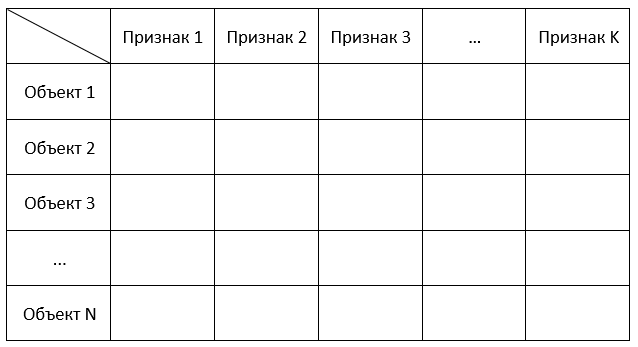

В нашем случае:

- Объекты - строки
- Признаки - количество слов в строке

ПРИМЕР того как может выглядеть такая таблица (сокращённый вариант):
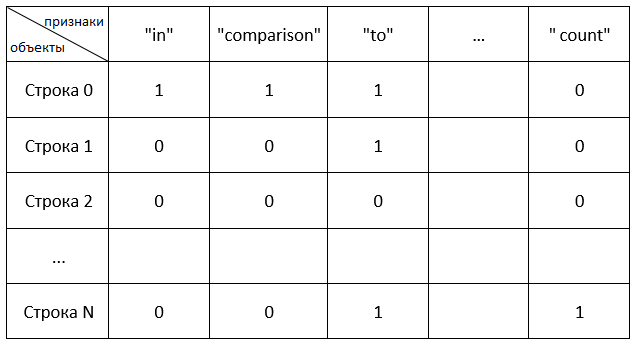

Для некоторых слов возможны значения больше 1. Например, слово "the" в 13 строке.

После чего определить сходство между 1 строкой и каждой из последующих посредством косинусного расстояния - scipy.spatial.distance.cosine().
Косинусное расстояние:
$$1 - \frac{u \cdot v}{\left \| u \right \|_{2} \cdot \left \| v \right \| _{2}}$$

Упражнения для самопроверки по отдельным этапам задачи - https://gist.github.com/lexnekr/2f1cb554651027970ab14ebaed8b3960#file-cats-exercises-ipynb


# Шаг 1.1
Откройте файл text.txt и выведите его содержимое на печать.

In [3]:
with open('text.txt') as f:
    print(f.read())

Any large snake that "constricts" its prey (see Constriction), if applied loosely, was called anaconda, though this usage is now archaic.
An anaconda is a large snake found in tropical South America.
Although the name applies to a group of snakes, it is often used to refer only to one species in particular, the common or green anaconda, Eunectes murinus, which is the largest snake in the world by weight, and the second longest.
The giant anaconda is a mythical snake of enormous proportions said to be found in South America.
Anaconda is an unincorporated community in Franklin County, Missouri, in the United States.
In 1903, the Socialist Party of America won its first victory west of the Mississippi when Anaconda voters elected a socialist mayor, treasurer, police judge, and three councilmen.
Anaconda was founded by Marcus Daly, one of the Copper Kings, who financed the construction of a smelter on nearby Warm Springs Creek to process copper ore from the Butte mines.
Anaconda, county se

# Шаг 1.2
Скачайте набор данных (это набор предложений на различные "змеиные" темы по аналогии с "кошачьими" из задачи курса на Coursera).

Пересчитайте число строк с текстом в нём.


Примечание. Особенности движка Stepik требуют наличие в конце файла с данными пустой строки! Пустую строку не следует учитывать при подсчёте строк.

In [6]:
filename="dataset_48784_7.txt"
sum(1 for line in open(filename, 'r'))

12

In [7]:
with open(filename, 'r') as f:
    print(len(f.readlines()))

12


# Шаг 2.1 - проход по списку

На вход подаётся 1 строка.

Напечатайте в 1 строку все 1-е символы из каждого слова через пробел.

Для разделения строки на слова можно использоваться функцию split():

S = 'Some string'
L = S.split() # ['Some', 'string']

In [8]:
words = input().split()
for word in words:
    print(word[0], end=' ')

Hello my friends
H m f 

In [9]:
print(*[i[0] for i in input().split()])

Hello my friends
H m f


# Шаг 2.2 - открытие файла и чтение

Скачайте набор данных

Выведите на печать в одну строку начальные символы из каждой строки. В качестве разделителя используйте пробел.


In [12]:
filename = r'dataset_48784_9.txt'
with open(filename, 'r') as f:
    print(*[line[0] for line in f])

A A


In [13]:
print(' '.join([line[0] for line in open(filename, 'r')]))

A A


# Шаг 3 - Приведение к нижнему регистру

- Считайте строку
- Приведите её к нижнему регистру
- Выведите строку в нижнем регистре на печать

In [14]:
S = r'Any large snake that "constricts" its prey (see Constriction), if applied loosely, was called anaconda, though this usage is now archaic.'

print(S.lower())

any large snake that "constricts" its prey (see constriction), if applied loosely, was called anaconda, though this usage is now archaic.


# Шаг 4 - разрезаем строку с помощью re

- Импортируйте модуль re
- Считайте строку
- Разрежьте её на отдельные слова с помощью re.split('[^a-z]', string)
- Получившийся список выведите на печать

In [15]:
import re


print(re.split(r'[^a-z]', input()))

Cat's power!
['', 'at', 's', 'power', '']


# Шаг 5 - Приводим к нижнему регистру и разрезаем

Объединим шаги 3 и 4.

- Импортируйте модуль re
- Прочитайте строку
- Приведите строку к нижнему регистру
- Разрежьте строку с помощью re.split('[^a-z]', string)
- Выведите на печать получившийся список

In [16]:
import re


print(re.split(r'[^a-z]', input().lower()))

Any large snake that "constricts" its prey (see Constriction).
['any', 'large', 'snake', 'that', '', 'constricts', '', 'its', 'prey', '', 'see', 'constriction', '', '']


# Шаг 6 - удаление пустых строк из списка

В данной задаче не надо ничего считывать или печатать!

Дан список вида:

L1 = ['cat', 's', '', 'power', '']

Необходимо очистить список от пустых строк и, сохранив порядок, передать новый список в переменную L2.

Тогда:

L2 = ['cat', 's', 'power']

Для решения этой задачи используйте тот факт, что любая строка ненулевой длины автоматически приводится к значению True в логических выражениях:
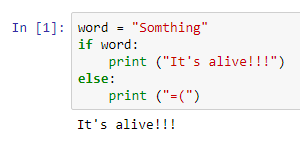

Пустая строка будет преобразована в False:
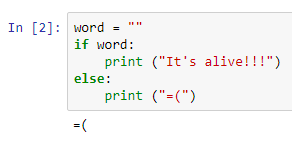

Подумайте как это можно сделать не в цикле, а с помощью list comprehension.


In [19]:
L1 = ['cat', 's', '', 'power', '']

L2 = [word for word in L1 if word]

# Шаг 7 - Вытянуть двумерный список

Дан двумерный список L1 (список списков) вида:

L1 = [['one', 'two', 'three'], [1, 2, 3, 4, 5, 6]]

Сохраните в список L2 все элементы дочерних списков L1 (т.е. вытяните их в 1 цепочку) вида:

['one', 'two', 'three', 1, 2, 3, 4, 5, 6]

- L1 может иметь произвольное число дочерних списков
- Длины дочерних списков могут быть произвольными (дочерний список может не содержать элементов) и не равны друг другу
- Элементы дочерних списков могут повторяться
- Порядок в получившемся списке L2 не важен

In [34]:
L1 = [['one', 'two', 'three'], [[1, 2, 3, 4, 5, 6]]]
L2 = []
for elem in L1:
    L2.extend(elem if isinstance(elem, list) else [elem])

L2

['one', 'two', 'three', [1, 2, 3, 4, 5, 6]]

In [35]:
L2=[j for i in L1 for j in i]
L2

['one', 'two', 'three', [1, 2, 3, 4, 5, 6]]

In [38]:
from collections.abc import Iterable

def flatten(l):
    for el in l:
        if isinstance(el, Iterable) and not isinstance(el, (str, bytes)):
            yield from flatten(el)
        else:
            yield el
            
L2 = flatten(L1)
print(*L2)

one two three 1 2 3 4 5 6
